Soru-1 İki farklı hisse senedi verilerini alıp tahmin yapın.

In [20]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta, timezone
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense, LSTM
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [11]:
#IBM verilerinin alınması
hisse1 = ['IBM']

hisse_fiyatlari1 = yf.download(hisse1,start = '2016-01-01',end = '2019-09-01',
                              interval='1d', prepost=True)
hisse_fiyatlari1["Average"] = (hisse_fiyatlari1["High"] + hisse_fiyatlari1["Low"])/2
hisse_fiyatlari1.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Average
Date,,,,,,,
2016-01-04,135.600006,135.970001,134.240005,135.949997,114.000061,5229400,135.105003
2016-01-05,136.759995,136.889999,134.850006,135.850006,113.916214,3924800,135.870003
2016-01-06,134.380005,135.580002,133.619995,135.169998,113.345993,4310900,134.599998
2016-01-07,133.699997,135.020004,132.429993,132.860001,111.408966,7025800,133.724998
2016-01-08,133.179993,133.820007,131.320007,131.630005,110.377556,4762700,132.570007


In [9]:
#Intel verilerinin alınması.
hisse2 = ['INTC']

hisse_fiyatlari2 = yf.download(hisse2,start = '2016-01-01',end = '2019-09-01',
                              interval='1d', prepost=True)
hisse_fiyatlari2["Average"] = (hisse_fiyatlari2["High"] + hisse_fiyatlari2["Low"])/2
hisse_fiyatlari2.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Average
Date,,,,,,,
2016-01-04,33.880001,34.009998,33.459999,33.990002,30.453503,27882200,33.734999
2016-01-05,33.959999,34.000000,33.529999,33.830002,30.310141,16709500,33.764999
2016-01-06,33.250000,33.520000,32.799999,33.080002,29.638180,25491300,33.160000
2016-01-07,32.279999,33.009998,31.840000,31.840000,28.527191,37680500,32.424999
2016-01-08,32.090000,32.220001,31.430000,31.510000,28.231529,29953800,31.825001


In [0]:
#her iki verinin işlem hacmi ve ortalama sürunlarını standardize ediyoruz.
girdi_verileri1 = hisse_fiyatlari1.iloc[:,[5,6]].values
sc= MinMaxScaler(feature_range=(0,1))
girdi_verileri1[:,0:2] = sc.fit_transform(girdi_verileri1[:,:])

In [0]:
girdi_verileri2 = hisse_fiyatlari2.iloc[:,[5,6]].values
sc= MinMaxScaler(feature_range=(0,1))
girdi_verileri2[:,0:2] = sc.fit_transform(girdi_verileri2[:,:])

In [0]:
#50 günlük fiyat ve işlem hacmi verileriyle bugünün fiyatını tahmin edebilmek için verileri hazırlıyoruz.
lookback= 50

test_size=int(.3 * len(hisse_fiyatlari1))
X1=[]
y1=[]
for i in range(len(hisse_fiyatlari1)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(girdi_verileri1[[(i+j)], :])
    X1.append(t)
    y1.append(girdi_verileri1[i+ lookback,1])

In [0]:
lookback= 50

test_size=int(.3 * len(hisse_fiyatlari2))
X2=[]
y2=[]
for i in range(len(hisse_fiyatlari2)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(girdi_verileri2[[(i+j)], :])
    X2.append(t)
    y2.append(girdi_verileri2[i+ lookback,1])

In [18]:
#LSTM'uygun boyutlu hale getiriyoruz.
X1, y1= np.array(X1), np.array(y1)
X1_test = X1[:test_size+lookback]
X1 = X1.reshape(X1.shape[0],lookback, 2)
X1_test = X1_test.reshape(X1_test.shape[0],lookback, 2)
print(X1.shape)
print(X1_test.shape)

(871, 50, 2)
(326, 50, 2)


In [19]:
X2, y2= np.array(X2), np.array(y2)
X2_test = X2[:test_size+lookback]
X2 = X2.reshape(X2.shape[0],lookback, 2)
X2_test = X2_test.reshape(X2_test.shape[0],lookback, 2)
print(X2.shape)
print(X2_test.shape)

(871, 50, 2)
(326, 50, 2)


In [21]:
#her iki veri için iki ayrı model kurulumu yapıyoruz.
model1 = Sequential()
model1.add(LSTM(units=30, return_sequences= True, input_shape=(X1.shape[1],2)))
model1.add(LSTM(units=30, return_sequences=True))
model1.add(LSTM(units=30))
model1.add(Dense(units=1))
model1.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 30)            3960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [22]:
model2 = Sequential()
model2.add(LSTM(units=30, return_sequences= True, input_shape=(X2.shape[1],2)))
model2.add(LSTM(units=30, return_sequences=True))
model2.add(LSTM(units=30))
model2.add(Dense(units=1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50, 30)            3960      
_________________________________________________________________
lstm_5 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_6 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [23]:
#iki modeli de derliyoruz.
model1.compile(optimizer='adam', loss='mean_squared_error')
model2.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model1.fit(X1, y1, epochs=200, batch_size=32, verbose=0)
model2.fit(X2, y2, epochs=200, batch_size=32, verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










In [0]:
#iki model ile ayrı ayrı tahmin yapıp sonuçların gerçek değerler ile grafiklerini çizdiriyoruz.
tahmin_değerleri1= model1.predict(X1_test)
tahmin_değerleri2= model2.predict(X2_test)

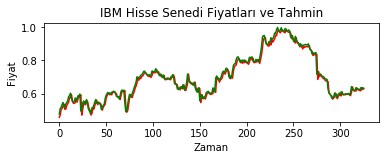

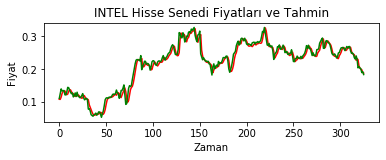

In [27]:
plt.subplot(2,1,1)
plt.plot(tahmin_değerleri1, color= 'red')
plt.plot(girdi_verileri1[lookback:test_size+(2*lookback),1], color='green')
plt.title("IBM Hisse Senedi Fiyatları ve Tahmin")
plt.xlabel("Zaman")
plt.ylabel("Fiyat")
plt.show()
plt.subplot(2,1,2)
plt.plot(tahmin_değerleri2, color= 'red')
plt.plot(girdi_verileri2[lookback:test_size+(2*lookback),1], color='green')
plt.title("INTEL Hisse Senedi Fiyatları ve Tahmin")
plt.xlabel("Zaman")
plt.ylabel("Fiyat")
plt.show()

Soru2-RNN'de ileri besleme ve geri yayılım yapılırken çarpılan ağırlık matrislerinin 1'den büyük veya 1'den küçük olması durumuna göre patlayan ve azalan gradient sorunu vardır. LSTM'de bu sorunların üstesinden gelinmiştir.

Soru3-LSTM'de yer alan epoch ve batch size parametrelerinin ne olduğunu araştırın.  
EPOCH: modelin eğitim sürecindeki aşamalrın her birine verilen ad. 
BATCH SIZE:öğrenme sürecinde her bir aşamada verinin ne kadarının işleneceği belirtir.

Bu iki parametreile oynanarak daha başarılı sonuçlar elde edebiliriz. Epoch sayısını artırmak belli bir yere kadar başarıyı artırır ancak bu da eğitim maliyetini de artıracaktır. Durulması gereken noktaya iyi karar verilmelidir.  
Aynı şekilde batch size karar verirken de dikkatli olmalıyız.Seçtiğimiz boyutun donanıma uygun olması, algortimaya uygun olması, eğitilecek verinin miktarı vb gibi unsurlara bağlıdır.